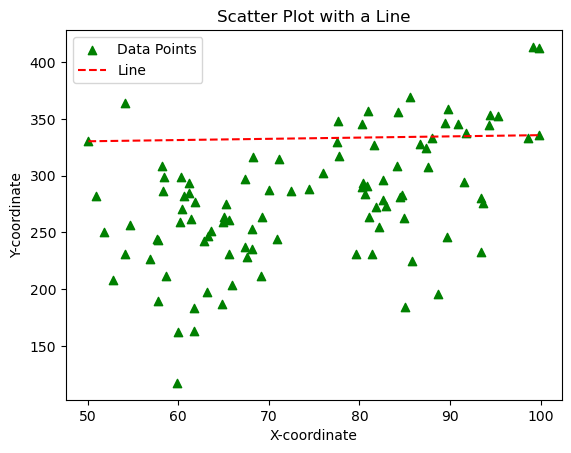

In [2]:
# Part 1 - Generate Plots According to Specifications
# Question 1
import pandas as pd
import matplotlib.pyplot as plt

# Step (a): Read data from the file and ignore comment lines starting with '%'
data = pd.read_csv("C:/Users/bsul\Downloads/scatter_data.csv", comment='%')

# Use the first and second columns from the CSV file
# Replace 'Column1' and 'Column2' with the actual column names in your CSV file
x = data.iloc[:, 0]  # Assuming 'x' data is in the first column
y = data.iloc[:, 1]  # Assuming 'y' data is in the second column

# Step (b): Plot the data points as green triangles
plt.scatter(x, y, marker='^', color='green', label='Data Points')

# Find the minimum and maximum x-values
min_x = x.min()
max_x = x.max()

# Plot a line connecting the two extreme points on the x-axis
plt.plot([min_x, max_x], [y[x.idxmin()], y[x.idxmax()]], linestyle='--', color='red', label='Line')

# Step (d): Title for the plot
plt.title('Scatter Plot with a Line')

# Step (e): Label the x- and y-axes
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Step (f): Include a legend
plt.legend()

# Display the plot
plt.show()

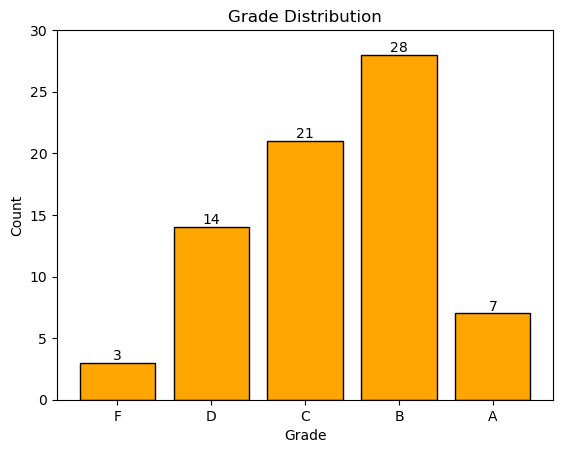

In [5]:
# Question 2
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("C://Users/bsul/Downloads/student_grades.csv")
df1
df1.columns = df1.columns.str.strip()
score = [(0, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
label = ['F', 'D', 'C', 'B', 'A']
df1['Letter Grade'] = pd.cut(df1['avgScore'], bins=[0, 60, 70, 80, 90, 101], labels=label, right=False) 
grades = df1['Letter Grade'].value_counts().reindex(label, fill_value=0)
plt.bar(label, grades, color='orange', edgecolor='black')
for label, count in zip(label, grades):
    plt.text(label, count, str(count), ha='center', va='bottom')

plt.title("Grade Distribution")
plt.ylim(0,30)
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()


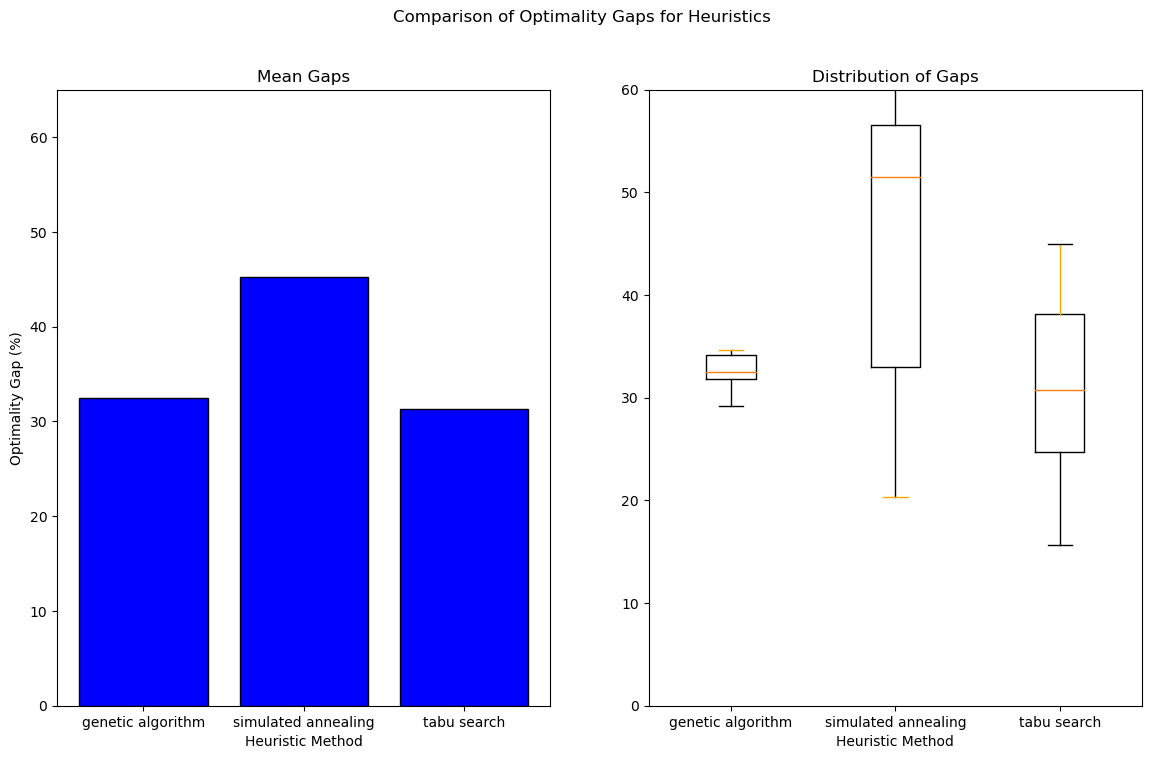

In [9]:
# Question 3
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/bsul/Downloads/solution_data.csv")
df.head()


# In[10]:


df['gap'] = df.groupby('% Problem')['Value'].transform(max) - df['Value']
df['gap_percent'] = (df['gap'] / df.groupby('% Problem')['Value'].transform(max)) * 100
heuristic_df = df[df['SolnMethod'] != 'optimal']
avg_gaps = heuristic_df.groupby('SolnMethod')['gap_percent'].mean().reset_index()
boxplot_data = heuristic_df.groupby('SolnMethod')['gap_percent'].apply(list).reset_index(name='gaps')
plt.figure(figsize=(14, 8))

# Barplot
plt.subplot(1, 2, 1)
plt.bar(avg_gaps['SolnMethod'], avg_gaps['gap_percent'], color='blue', edgecolor='black')
plt.xlabel('Heuristic Method')
plt.ylabel('Optimality Gap (%)')
plt.title('Mean Gaps')

plt.ylim(0,65)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(boxplot_data['gaps'], labels=boxplot_data['SolnMethod'])
plt.xlabel('Heuristic Method')
plt.title('Distribution of Gaps')

plt.ylim(0,60)
# Set the median line color.
for median in plt.gca().lines[4::6]:
    median.set_color('orange')

plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.show()

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_2022 = pd.read_csv('C:/Users/bsul/Downloads/archive/japan_20220317_query.csv')
data_2021 = pd.read_csv('C:/Users/bsul/Downloads/archive/japan_20190101-20211009_query.csv')

def calculate_psd(data):df(2021)
   signal = data['frequency']
    n = len(signal)
    fs = 1.0  # Sample rate (Hz)
    frequencies = np.fft.fftfreq(n, 1 / fs)
    fft_values = np.fft.fft(signal)
    psd = np.abs(fft_values) ** 2 / (n * fs)
    return frequencies, 10 * np.log10(psd)

frequencies_2020, psd_2022 = calculate_psd(data_2022)
frequencies_2021, psd_2021 = calculate_psd(data_2021)
# Plot the PSD for each year
plt.figure(figsize=(10, 6))
plt.semilogx(frequencies_2022, psd_2021, label='2022')
plt.semilogx(frequencies_2021, psd_2021, label='2021')
# Add more years as needed
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density of Seismic Data in Japan')
plt.legend()
plt.grid(True)
plt.show()







IndentationError: unexpected indent (393295551.py, line 9)